# Position classes visualization

1 | 2
--|--
3 | 4


In [4]:
import matplotlib.pyplot as plt

from dataloader import SmoothedSpikesDataset
from param import *
from util import bin_pos

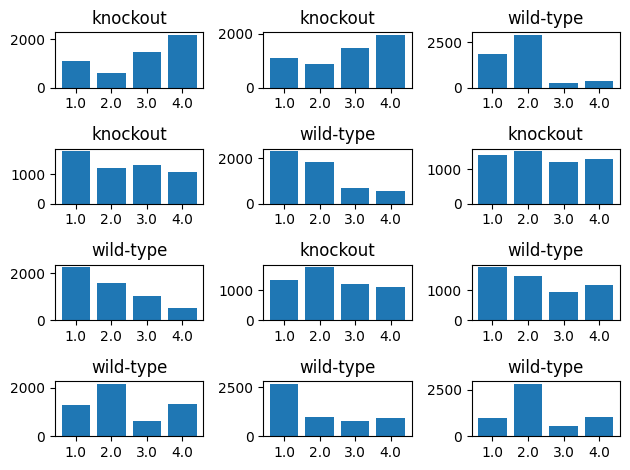

In [21]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, tight_layout = True)
axes = axes.ravel()

for id_, data_dir in enumerate(ParamDir().data_path_list):
    coord_axis = "x-axis"
    dataset = SmoothedSpikesDataset(data_dir, coord_axis, False, False)
    n_class = bin_pos(dataset.coords_xy)
    classes, count = np.unique(n_class, return_counts=True)
    axes[id_].bar((classes).astype(str), count)
    if "KO" in str(data_dir):
        mouse_type = "knockout"
    else:
        mouse_type = "wild-type"
    axes[id_].set_title(mouse_type)